<a href="https://colab.research.google.com/github/suyeonlee333333/oss2025/blob/main/free_rider_simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!apt-get -y install -qq fonts-nanum
!pip install gradio


Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.0 MB/s eta 0:00:00


# 🚇 무임승차 손실 예측 시뮬레이터
기준 연령에 따라 무임인원 → 무임손실액 → 총손실액을 예측하는 모델을 구성합니다.

In [4]:
# 1️⃣ 파일 불러오기
import pandas as pd
file_path = 're_study_data.xlsx'
df = pd.read_excel(file_path)
df.head()

,연도,월,연령,지하철 이용량,고령 인구수,무임인원,무임인원비율,무임손실 (백만),누적손실액
0,2021,1,65,17834292,649577,5419112,0.303859,7586.7568,7586.7568
1,2021,2,65,18431141,652254,5505261,0.298693,7707.3654,15294.1222
2,2021,3,65,23348552,655874,7028495,0.301025,9839.8930,25134.0152
3,2021,4,65,22250031,658150,6783118,0.304859,9496.3652,34630.3804
4,2021,5,65,22606497,660561,6864538,0.303653,9610.3532,44240.7336


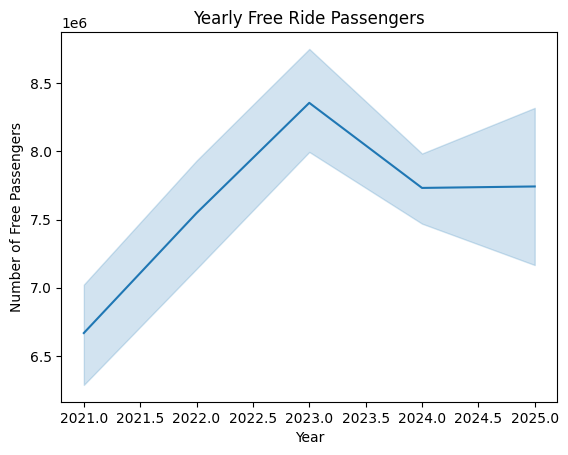

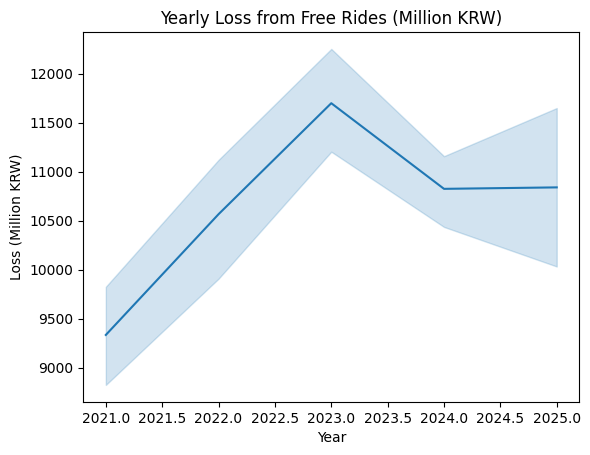

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 컬럼명 영어로 변경 (이미 하신 부분 포함)
df = df.rename(columns={
    '연도': 'Year',
    '월': 'Month',
    '연령': 'Age',
    '지하철 이용량': 'SubwayUsage',
    '고령 인구수': 'SeniorPopulation',
    '무임인원': 'FreeRidePassengers',
    '무임인원비율': 'FreeRideRatio',
    '무임손실 (백만)': 'LossFromFreeRides_MillionKRW',
    '누적손실액': 'CumulativeLoss_MillionKRW'
})

# ✅ 기본 영어 폰트 설정 및 마이너스 깨짐 방지
plt.rc('font', family='DejaVu Sans')
plt.rcParams['axes.unicode_minus'] = False

# ✅ 시각화 1: Year vs Free Passengers
sns.lineplot(data=df, x='Year', y='FreeRidePassengers')
plt.title('Yearly Free Ride Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Free Passengers')
plt.show()

# ✅ 시각화 2: Year vs Free Ride Loss
sns.lineplot(data=df, x='Year', y='LossFromFreeRides_MillionKRW')
plt.title('Yearly Loss from Free Rides (Million KRW)')
plt.xlabel('Year')
plt.ylabel('Loss (Million KRW)')
plt.show()


📊 MSE (Mean Squared Error): 327170550316.753
📈 R² score (결정계수): 0.34209500816851723


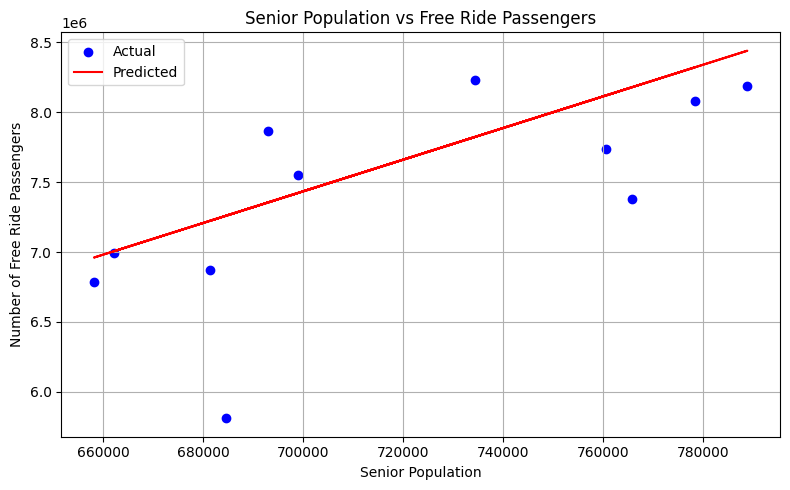

       SeniorPopulation  FreeRidePassengers
count         52.000000        5.200000e+01
mean      718070.538462        7.588489e+06
std        41720.649110        8.678786e+05
min       649577.000000        5.419112e+06
25%       683742.750000        7.020428e+06
50%       717977.000000        7.614680e+06
75%       753714.250000        8.189665e+06
max       791720.000000        9.620908e+06


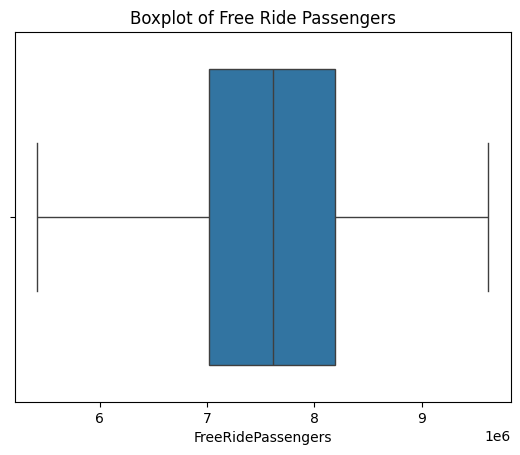

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ✔️ matplotlib 기본 설정 복구 (폰트 깨짐 방지)
mpl.rcdefaults()
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='DejaVu Sans')

# ✔️ X: 고령인구수 / y: 무임인원
X = df[['SeniorPopulation']]
y = df['FreeRidePassengers']

# ✔️ 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✔️ 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# ✔️ 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 MSE (Mean Squared Error):", mse)
print("📈 R² score (결정계수):", r2)

# ✔️ 시각화: 실제값 vs 예측값
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.xlabel('Senior Population')
plt.ylabel('Number of Free Ride Passengers')
plt.title('Senior Population vs Free Ride Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ✔️ 통계 정보 확인
print(df[['SeniorPopulation', 'FreeRidePassengers']].describe())

# ✔️ 이상치 확인 (boxplot)
sns.boxplot(data=df, x='FreeRidePassengers')
plt.title('Boxplot of Free Ride Passengers')
plt.show()




MSE: 3.007929500192828e-25
R² score: 1.0
Coefficient (Slope): 0.0014
Intercept: 0.0


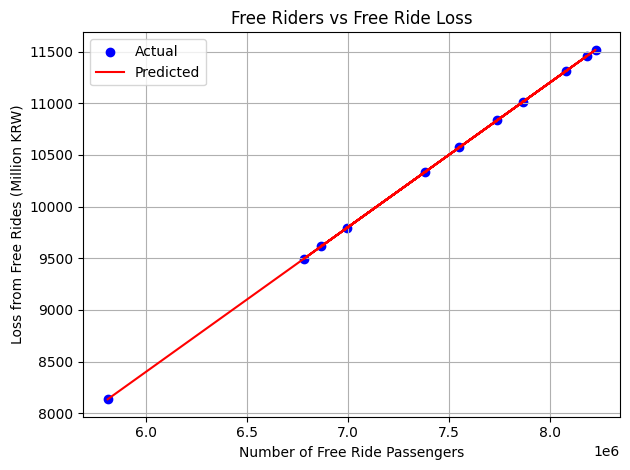

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Feature, Target 정의
X2 = df[['FreeRidePassengers']]
y2 = df['LossFromFreeRides_MillionKRW']

# 2. 학습/테스트 분할
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# 3. 선형 회귀 모델 학습
model_2 = LinearRegression()
model_2.fit(X_train2, y_train2)

# 4. 예측 및 평가
y_pred2 = model_2.predict(X_test2)
mse2 = mean_squared_error(y_test2, y_pred2)
r2_2 = r2_score(y_test2, y_pred2)

print("MSE:", mse2)
print("R² score:", r2_2)
print("Coefficient (Slope):", model_2.coef_[0])
print("Intercept:", model_2.intercept_)

# 5. 시각화
plt.scatter(X_test2, y_test2, label='Actual', color='blue')
plt.plot(X_test2, y_pred2, label='Predicted', color='red')
plt.xlabel('Number of Free Ride Passengers')
plt.ylabel('Loss from Free Rides (Million KRW)')
plt.title('Free Riders vs Free Ride Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Predicted cumulative loss: [19563.78072859 21332.25156194 52601.27269232 47564.16178361
 49235.55547653]


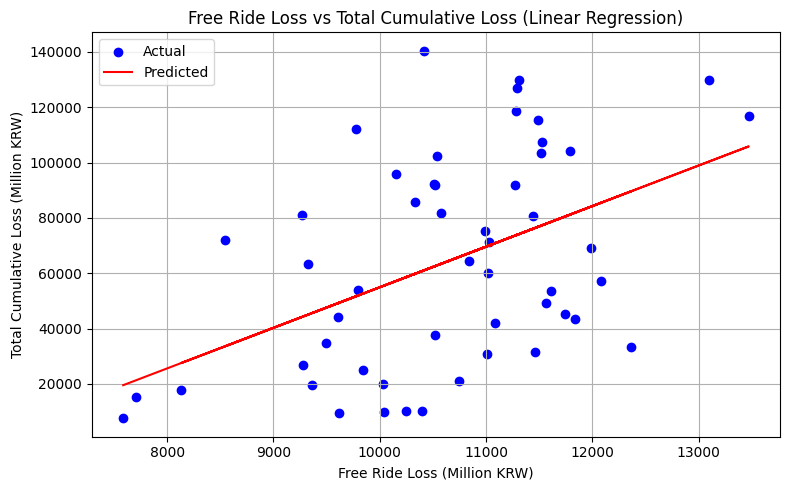

Mean Squared Error (MSE): 1139104589.9715033
R² Score: 0.2146301668018744


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Feature / Target 정의
X3 = df[['LossFromFreeRides_MillionKRW']]     # 단위: 백만 원
y3 = df['CumulativeLoss_MillionKRW']          # 누적 손실액

# 2. 모델 생성 및 학습
model_3 = LinearRegression()
model_3.fit(X3, y3)

# 3. 예측
y_pred = model_3.predict(X3)
print("Predicted cumulative loss:", y_pred[:5])  # 상위 5개 예측값만 출력

# 4. 시각화
plt.figure(figsize=(8, 5))
plt.scatter(X3, y3, label='Actual', color='blue')
plt.plot(X3, y_pred, label='Predicted', color='red')
plt.xlabel('Free Ride Loss (Million KRW)')
plt.ylabel('Total Cumulative Loss (Million KRW)')
plt.title('Free Ride Loss vs Total Cumulative Loss (Linear Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. 평가 지표
mse = mean_squared_error(y3, y_pred)
r2 = r2_score(y3, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


   YearMonth  AgeThreshold  EstimatedFreeRidePassengers  EstimatedLoss  \
0 2024-12-01            65                      8080271          11312   
1 2024-12-01            70                      5229751           7322   
2 2024-12-01            75                      3206418           4489   
3 2024-12-01            80                      1741426           2438   
4 2024-12-01            85                       711026            995   

   EstimatedTotalLoss  
0               74192  
1               15677  
2              -25859  
3              -55932  
4              -77084  


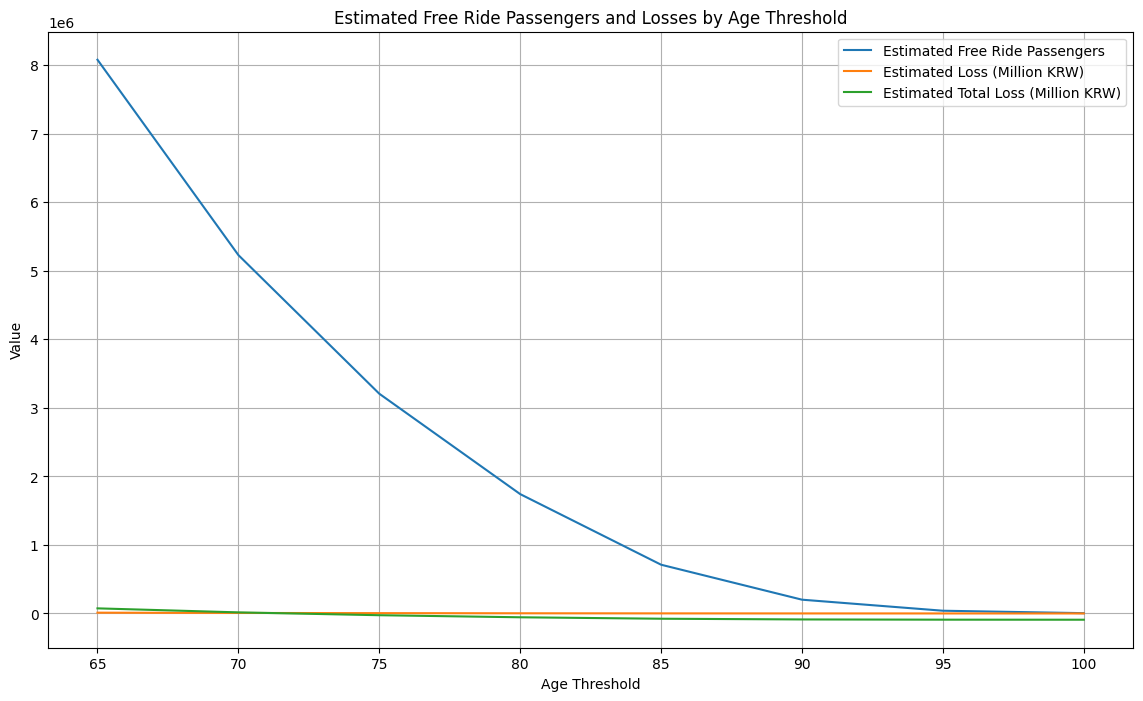

In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. 주 시트 데이터 불러오기
df = pd.read_excel('re_study_data.xlsx')

# 2. 컬럼명 영어로 변경
df = df.rename(columns={
    '연령': 'Age',
    '무임인원': 'FreeRidePassengers',
    '무임손실 (백만)': 'LossFromFreeRides_MillionKRW',
    '누적손실액': 'CumulativeLoss_MillionKRW',
    '고령 인구수': 'SeniorPopulation',
    '지하철 이용량': 'SubwayUsage',
    '연도': 'Year',
    '월': 'Month'
})

# 3. YearMonth 생성 (연도 + 월 → 날짜 포맷)
df['YearMonth'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2))

# 4. 모델 1: Age → FreeRidePassengers
X1 = df[['Age']]
y1 = df['FreeRidePassengers']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
model_1 = LinearRegression()
model_1.fit(X_train1, y_train1)

# 5. 모델 2: FreeRidePassengers → LossFromFreeRides_MillionKRW
X2 = df[['FreeRidePassengers']]
y2 = df['LossFromFreeRides_MillionKRW']
model_2 = LinearRegression()
model_2.fit(X2, y2)

# 6. 모델 3: LossFromFreeRides_MillionKRW → CumulativeLoss_MillionKRW
X3 = df[['LossFromFreeRides_MillionKRW']]
y3 = df['CumulativeLoss_MillionKRW']
model_3 = LinearRegression()
model_3.fit(X3, y3)

# 7. 월별 인구 수 시트 불러오기 및 전처리
age_raw = pd.read_excel('re_study_data.xlsx', sheet_name='월별 인구 수')
age_raw.drop(columns=age_raw.columns[1], inplace=True)
age_raw.rename(columns={age_raw.columns[0]: 'YearMonth'}, inplace=True)
age_raw = age_raw[~age_raw['YearMonth'].astype(str).str.contains('합')]
age_raw['YearMonth'] = pd.to_datetime(age_raw['YearMonth'], errors='coerce')
age_raw = age_raw.dropna(subset=['YearMonth'])
age_raw['Year'] = age_raw['YearMonth'].dt.year
age_raw['Month'] = age_raw['YearMonth'].dt.month

# 8. 2021~2024 필터링
filtered_df = age_raw[(age_raw['Year'] >= 2021) & (age_raw['Year'] <= 2024)]

# 9. 요약 시트 불러오기 및 연월 생성
summary_df = pd.read_excel('re_study_data.xlsx', sheet_name=0)
summary_df = summary_df.rename(columns={
    '무임인원': 'FreeRidePassengers',
    '지하철 이용량': 'SubwayUsage',
    '연도': 'Year',
    '월': 'Month'
})
summary_df['YearMonth'] = pd.to_datetime(summary_df['Year'].astype(str) + '-' + summary_df['Month'].astype(str).str.zfill(2))

# 10. 병합
merged_df = pd.merge(
    filtered_df,
    summary_df[['YearMonth', 'FreeRidePassengers', 'SubwayUsage']],
    on='YearMonth',
    how='left'
)

# 11. 추정 함수들

def estimate_free_riders_by_virtual_policy(age, df, total_free_riders):
    total_old_population = df['SeniorPopulation'].sum()
    eligible_df = df[df['Age'] >= age]
    if eligible_df.empty or total_old_population == 0:
        return 0
    eligible_population = eligible_df['SeniorPopulation'].sum()
    eligible_ratio = eligible_population / total_old_population
    estimated_free_riders = total_free_riders * eligible_ratio
    return estimated_free_riders


def simulate_loss(age, df, total_free_riders):
    count = estimate_free_riders_by_virtual_policy(age, df, total_free_riders)
    if count == 0:
        return 0, 0, 0
    loss = model_2.predict(pd.DataFrame({'FreeRidePassengers': [count]}))[0]
    total = model_3.predict(pd.DataFrame({'LossFromFreeRides_MillionKRW': [loss]}))[0]
    return count, loss, total

# 12. 시뮬레이션 실행
results = []

for idx, row in merged_df.iterrows():
    year_month = row['YearMonth']
    total_passengers = row['SubwayUsage']
    total_free_riders = row['FreeRidePassengers']

    age_data = row.filter(regex=r'^\d+$')
    age_data.index = age_data.index.astype(int)

    df_month = pd.DataFrame({
        'Age': age_data.index,
        'SeniorPopulation': age_data.values,
        'FreeRidePassengers': [0] * len(age_data),
        'SubwayUsage': total_passengers
    })

for age_threshold in range(65, 101, 5):
    count, loss, total = simulate_loss(age_threshold, df_month, total_free_riders)
    results.append({
        'YearMonth': year_month,
        'AgeThreshold': age_threshold,
        'EstimatedFreeRidePassengers': round(count),
        'EstimatedLoss': round(loss),
        'EstimatedTotalLoss': round(total)
    })


# 13. 결과 출력
results_df = pd.DataFrame(results)
print(results_df.head())

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화: AgeThreshold별 EstimatedFreeRidePassengers, EstimatedLoss, EstimatedTotalLoss 추이
plt.figure(figsize=(14, 8))

sns.lineplot(data=results_df, x='AgeThreshold', y='EstimatedFreeRidePassengers', label='Estimated Free Ride Passengers')
sns.lineplot(data=results_df, x='AgeThreshold', y='EstimatedLoss', label='Estimated Loss (Million KRW)')
sns.lineplot(data=results_df, x='AgeThreshold', y='EstimatedTotalLoss', label='Estimated Total Loss (Million KRW)')

plt.title('Estimated Free Ride Passengers and Losses by Age Threshold')
plt.xlabel('Age Threshold')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import gradio as gr

# 1. 원본 데이터 불러오기 및 컬럼명 변경
df = pd.read_excel('re_study_data.xlsx')
df = df.rename(columns={
    '연령': 'Age',
    '무임인원': 'FreeRidePassengers',
    '무임손실 (백만)': 'LossFromFreeRides_MillionKRW',
    '누적손실액': 'CumulativeLoss_MillionKRW',
    '고령 인구수': 'SeniorPopulation',
    '지하철 이용량': 'SubwayUsage',
    '연도': 'Year',
    '월': 'Month'
})
df['YearMonth'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2))

# 2. 모델 1: Age → FreeRidePassengers
X1 = df[['Age']]
y1 = df['FreeRidePassengers']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
model_1 = LinearRegression()
model_1.fit(X_train1, y_train1)

# 3. 모델 2: FreeRidePassengers → LossFromFreeRides_MillionKRW
X2 = df[['FreeRidePassengers']]
y2 = df['LossFromFreeRides_MillionKRW']
model_2 = LinearRegression()
model_2.fit(X2, y2)

# 4. 모델 3: LossFromFreeRides_MillionKRW → CumulativeLoss_MillionKRW
X3 = df[['LossFromFreeRides_MillionKRW']]
y3 = df['CumulativeLoss_MillionKRW']
model_3 = LinearRegression()
model_3.fit(X3, y3)

# 5. 월별 인구 수 시트 불러오기 및 전처리
age_raw = pd.read_excel('re_study_data.xlsx', sheet_name='월별 인구 수')
age_raw.drop(columns=age_raw.columns[1], inplace=True)
age_raw.rename(columns={age_raw.columns[0]: 'YearMonth'}, inplace=True)
age_raw = age_raw[~age_raw['YearMonth'].astype(str).str.contains('합')]
age_raw['YearMonth'] = pd.to_datetime(age_raw['YearMonth'], errors='coerce')
age_raw = age_raw.dropna(subset=['YearMonth'])
age_raw['Year'] = age_raw['YearMonth'].dt.year
age_raw['Month'] = age_raw['YearMonth'].dt.month

# 6. 추정 함수들 정의

def estimate_free_riders_by_virtual_policy(age_threshold, df_population, total_free_riders):
    total_old_population = df_population['SeniorPopulation'].sum()
    eligible_df = df_population[df_population['Age'] >= age_threshold]
    if eligible_df.empty or total_old_population == 0:
        return 0
    eligible_population = eligible_df['SeniorPopulation'].sum()
    eligible_ratio = eligible_population / total_old_population
    estimated_free_riders = total_free_riders * eligible_ratio
    return estimated_free_riders

def simulate_loss(age_threshold, df_population, total_free_riders):
    count = estimate_free_riders_by_virtual_policy(age_threshold, df_population, total_free_riders)
    if count == 0:
        return 0, 0, 0
    loss = model_2.predict(pd.DataFrame({'FreeRidePassengers': [count]}))[0]
    total = model_3.predict(pd.DataFrame({'LossFromFreeRides_MillionKRW': [loss]}))[0]
    return count, loss, total

# 7. Gradio UI용 손실 예측 함수

def predict_loss(age_threshold):
    try:
        latest_yearmonth = age_raw['YearMonth'].max()
        recent_age_data = age_raw[age_raw['YearMonth'] == latest_yearmonth]

        # 컬럼명들을 문자열로 변환 후 숫자로 변환 가능한 컬럼만 골라내기
        age_columns = []
        for col in recent_age_data.columns:
            try:
                # 컬럼명을 문자열로 변환 후 int 변환 시도
                int_col = int(str(col))
                age_columns.append(col)
            except:
                pass

        if not age_columns:
            return {"error": "No numeric age columns found."}

        age_population = recent_age_data[age_columns]

        # melt 변환
        age_population = age_population.melt(var_name='Age', value_name='SeniorPopulation')

        # Age 컬럼 int 변환
        age_population['Age'] = age_population['Age'].astype(int)

        # NaN 값 제거 (인구수에 NaN이 있을 수 있으니 제거)
        age_population = age_population.dropna(subset=['SeniorPopulation'])

        # total_free_riders도 해당 연월 데이터에서 계산
        total_free_riders = df[df['YearMonth'] == latest_yearmonth]['FreeRidePassengers'].sum()

        count, loss, total = simulate_loss(age_threshold, age_population, total_free_riders)

        return {
            'Estimated Free Ride Passengers': round(count),
            'Estimated Loss (Million KRW)': round(loss),
            'Estimated Total Loss (Million KRW)': round(total)
        }

    except Exception as e:
        return {"error": str(e)}



# 8. Gradio 인터페이스 생성 및 실행

gr.Interface(
    fn=predict_loss,
    inputs=gr.Slider(60, 100, step=1, label='Age Threshold'),
    outputs='json',
    title='Subway Free Ride Loss Prediction',
    description='Predict estimated free ride passengers and losses based on age threshold.'
).launch()

# 9. 모델 상태 출력 (디버깅용)

print("Model 1 coefficient (Age → FreeRidePassengers):", model_1.coef_)
print("Model 2 coefficient (FreeRidePassengers → Loss):", model_2.coef_)
print("Model 3 coefficient (Loss → CumulativeLoss):", model_3.coef_)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://371aa0a5ccef73c506.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Model 1 coefficient (Age → FreeRidePassengers): [0.]
Model 2 coefficient (FreeRidePassengers → Loss): [0.0014]
Model 3 coefficient (Loss → CumulativeLoss): [14.66289165]
